In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv('/content/HomeC.csv')
df.head()

<ipython-input-19-a45b6b7baacb>:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/HomeC.csv')


time  use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
0  1451624400  0.932833  0.003483            0.932833         0.000033   
1  1451624401  0.934333  0.003467            0.934333         0.000000   
2  1451624402  0.931817  0.003467            0.931817         0.000017   
3  1451624403  1.022050  0.003483            1.022050         0.000017   
4  1451624404  1.139400  0.003467            1.139400         0.000133   

   Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
0        0.020700        0.061917          0.442633     0.124150   
1        0.020717        0.063817          0.444067     0.124000   
2        0.020700        0.062317          0.446067     0.123533   
3        0.106900        0.068517          0.446583     0.123133   
4        0.236933        0.063983          0.446533     0.122850   

   Wine cellar [kW]  ...  visibility  summary  apparentTemperature  pressure  \
0          0.006983  ...        10.0    Clear                29.26   1016.91   
1          0.006983  ...        10.0    Clear                29.26   1016.91   
2          0.006983  ...        10.0    Clear                29.26   1016.91   
3          0.006983  ...        10.0    Clear                29.26   1016.91   
4          0.006850  ...        10.0    Clear                29.26   1016.91   

   windSpeed  cloudCover  windBearing  precipIntensity  dewPoint  \
0       9.18  cloudCover        282.0              0.0      24.4   
1       9.18  cloudCover        282.0              0.0      24.4   
2       9.18  cloudCover        282.0              0.0      24.4   
3       9.18  cloudCover        282.0              0.0      24.4   
4       9.18  cloudCover        282.0              0.0      24.4   

   precipProbability  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  

[5 rows x 32 columns]

In [ ]:
df.drop(columns=['time', 'icon', 'summary', 'cloudCover'], inplace=True)

In [ ]:
df.head()

use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  Furnace 1 [kW]  \
0  0.932833  0.003483            0.932833         0.000033        0.020700   
1  0.934333  0.003467            0.934333         0.000000        0.020717   
2  0.931817  0.003467            0.931817         0.000017        0.020700   
3  1.022050  0.003483            1.022050         0.000017        0.106900   
4  1.139400  0.003467            1.139400         0.000133        0.236933   

   Furnace 2 [kW]  Home office [kW]  Fridge [kW]  Wine cellar [kW]  \
0        0.061917          0.442633     0.124150          0.006983   
1        0.063817          0.444067     0.124000          0.006983   
2        0.062317          0.446067     0.123533          0.006983   
3        0.068517          0.446583     0.123133          0.006983   
4        0.063983          0.446533     0.122850          0.006850   

   Garage door [kW]  ...  temperature  humidity  visibility  \
0          0.013083  ...        36.14      0.62        10.0   
1          0.013117  ...        36.14      0.62        10.0   
2          0.013083  ...        36.14      0.62        10.0   
3          0.013000  ...        36.14      0.62        10.0   
4          0.012783  ...        36.14      0.62        10.0   

   apparentTemperature  pressure  windSpeed  windBearing  precipIntensity  \
0                29.26   1016.91       9.18        282.0              0.0   
1                29.26   1016.91       9.18        282.0              0.0   
2                29.26   1016.91       9.18        282.0              0.0   
3                29.26   1016.91       9.18        282.0              0.0   
4                29.26   1016.91       9.18        282.0              0.0   

   dewPoint  precipProbability  
0      24.4                0.0  
1      24.4                0.0  
2      24.4                0.0  
3      24.4                0.0  
4      24.4                0.0  

[5 rows x 28 columns]

In [ ]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440121 entries, 0 to 440120
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   use [kW]             440121 non-null  float64
 1   gen [kW]             440121 non-null  float64
 2   House overall [kW]   440121 non-null  float64
 3   Dishwasher [kW]      440121 non-null  float64
 4   Furnace 1 [kW]       440121 non-null  float64
 5   Furnace 2 [kW]       440121 non-null  float64
 6   Home office [kW]     440121 non-null  float64
 7   Fridge [kW]          440121 non-null  float64
 8   Wine cellar [kW]     440121 non-null  float64
 9   Garage door [kW]     440121 non-null  float64
 10  Kitchen 12 [kW]      440121 non-null  float64
 11  Kitchen 14 [kW]      440121 non-null  float64
 12  Kitchen 38 [kW]      440121 non-null  float64
 13  Barn [kW]            440121 non-null  float64
 14  Well [kW]            440121 non-null  float64
 15  Microwave [kW]   

use [kW]               0
gen [kW]               0
House overall [kW]     0
Dishwasher [kW]        0
Furnace 1 [kW]         0
Furnace 2 [kW]         0
Home office [kW]       0
Fridge [kW]            0
Wine cellar [kW]       0
Garage door [kW]       0
Kitchen 12 [kW]        0
Kitchen 14 [kW]        0
Kitchen 38 [kW]        0
Barn [kW]              0
Well [kW]              0
Microwave [kW]         1
Living room [kW]       1
Solar [kW]             1
temperature            1
humidity               1
visibility             1
apparentTemperature    1
pressure               1
windSpeed              1
windBearing            1
precipIntensity        1
dewPoint               1
precipProbability      1
dtype: int64

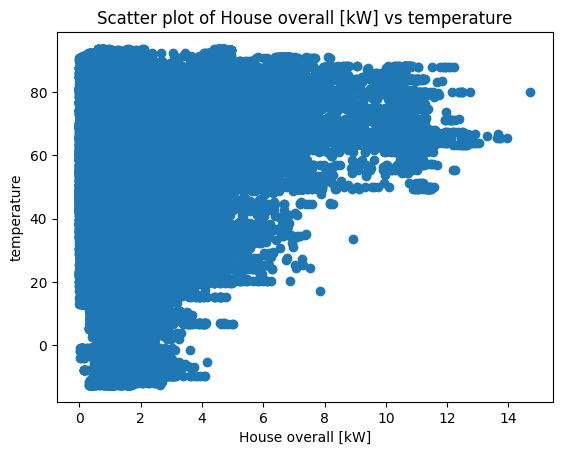

In [ ]:
plt.scatter(df['House overall [kW]'], df['temperature'])
plt.xlabel('House overall [kW]')
plt.ylabel('temperature')
plt.title('Scatter plot of House overall [kW] vs temperature')
plt.show()

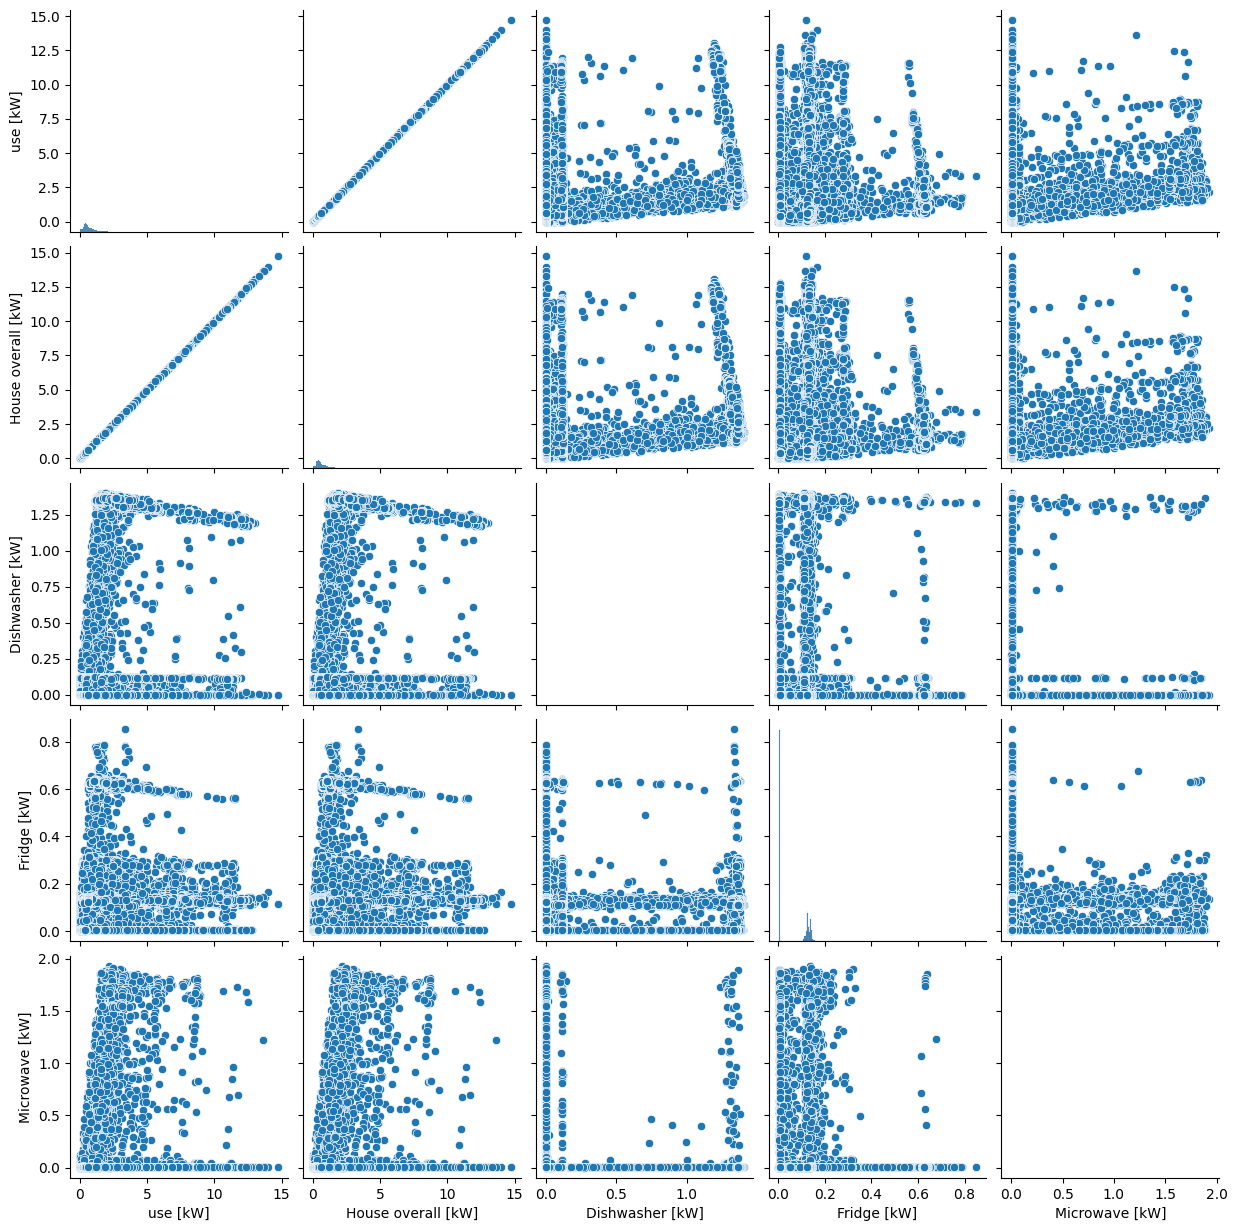

In [ ]:
subset_df = df[['use [kW]', 'House overall [kW]',  'Dishwasher [kW]', 'Fridge [kW]', 'Microwave [kW]']]
sns.pairplot(subset_df)
plt.show()

MEMULAI PROSES

In [ ]:
X = df.drop(columns=['House overall [kW]'])
y = df['House overall [kW]']

In [ ]:
scale = MinMaxScaler()
X_scaled = scale.fit_transform(X)
y_scaled = scale.fit_transform(y.values.reshape(-1, 1))

Penskalaan fitur dan variabel target sering dilakukan dalam berbagai tugas pemodelan machine learning, terutama ketika fitur atau variabel target memiliki rentang nilai yang sangat berbeda. Penskalaan dapat meningkatkan kinerja dan stabilitas beberapa algoritma machine learning yang sensitif terhadap skala fitur atau variabel target.

X_scaled dan y_scaled berisi fitur dan variabel target yang telah diskala menggunakan MinMaxScaler. berfungsi sebagai input proses pemodelan machine learning selanjutnya.

In [ ]:
imputer = SimpleImputer(strategy='mean')

In [ ]:
X_imputed = imputer.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

ANN MODEL

In [ ]:
# Membuat dan melatih model ANN
ann = Sequential([
    Dense(32, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(1, activation='linear')
])

ann.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

membuat model ANN sederhana dengan satu lapisan tersembunyi yang memiliki 32 neuron dan fungsi aktivasi ReLU, serta satu lapisan output dengan satu neuron dan fungsi aktivasi linear. Model ini dioptimisasi menggunakan optimizer Adam dan dilatih dengan fungsi loss MSE serta metrik evaluasi MAE.

Proses pelatihan dilakukan selama 50 epoch, dan 20% dari data latih digunakan sebagai data validasi untuk memantau overfitting dan kinerja model selama pelatihan. Objek history yang dihasilkan dapat digunakan untuk memvisualisasikan plot loss dan metrik selama pelatihan, yang dapat membantu menganalisis kinerja dan konvergensi model.

In [ ]:
history = ann.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
8803/8803 [==============================] - 25s 3ms/step - loss: 2.8407e-04 - mean_absolute_error: 0.0047 - val_loss: 1.2672e-06 - val_mean_absolute_error: 7.7436e-04
Epoch 2/50
8803/8803 [==============================] - 21s 2ms/step - loss: 2.5809e-06 - mean_absolute_error: 0.0010 - val_loss: 2.7475e-06 - val_mean_absolute_error: 0.0016
Epoch 3/50
8803/8803 [==============================] - 23s 3ms/step - loss: 1.9380e-06 - mean_absolute_error: 9.0122e-04 - val_loss: 3.2768e-07 - val_mean_absolute_error: 4.5013e-04
Epoch 4/50
8803/8803 [==============================] - 24s 3ms/step - loss: 1.8849e-06 - mean_absolute_error: 8.7352e-04 - val_loss: 5.3081e-06 - val_mean_absolute_error: 0.0018
Epoch 5/50
8803/8803 [==============================] - 24s 3ms/step - loss: 1.9592e-06 - mean_absolute_error: 8.0505e-04 - val_loss: 2.3083e-07 - val_mean_absolute_error: 4.3815e-04
Epoch 6/50
8803/8803 [==============================] - 22s 3ms/step - loss: 1.5560e-06 - mean_absolu

In [ ]:
ann.evaluate(X_test, y_test)

2751/2751 [==============================] - 4s 2ms/step - loss: nan - mean_absolute_error: nan


[nan, nan]

In [ ]:
ann.evaluate(X_test, y_test)

2751/2751 [==============================] - 5s 2ms/step - loss: nan - mean_absolute_error: nan


[nan, nan]

In [ ]:
print(df.isna().sum())

use [kW]               0
gen [kW]               0
House overall [kW]     0
Dishwasher [kW]        0
Furnace 1 [kW]         0
Furnace 2 [kW]         0
Home office [kW]       0
Fridge [kW]            0
Wine cellar [kW]       0
Garage door [kW]       0
Kitchen 12 [kW]        0
Kitchen 14 [kW]        0
Kitchen 38 [kW]        0
Barn [kW]              0
Well [kW]              0
Microwave [kW]         1
Living room [kW]       1
Solar [kW]             1
temperature            1
humidity               1
visibility             1
apparentTemperature    1
pressure               1
windSpeed              1
windBearing            1
precipIntensity        1
dewPoint               1
precipProbability      1
dtype: int64


In [ ]:
# Membuat objek SimpleImputer dengan strategi 'mean'
numeric_imputer = SimpleImputer(strategy='mean')

# Melakukan imputasi pada semua kolom numerik
X_test = numeric_imputer.fit_transform(X_test)

In [ ]:
# Melakukan prediksi dan menghitung R2 score
ann_y_pred = ann.predict(X_test)
r2 = r2_score(y_test, ann_y_pred)
print('R2 score:', r2)

2751/2751 [==============================] - 5s 2ms/step
R2 score: 0.9999545979085191


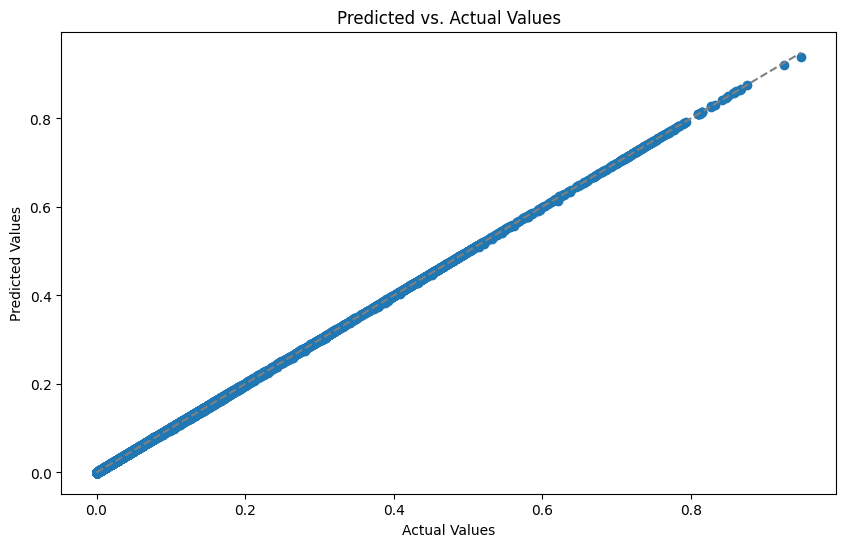

In [ ]:
# Visualisasi hasil prediksi
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ann_y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.show()

In [ ]:
# Menampilkan kinerja pelatihan
print(history.history.keys())

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


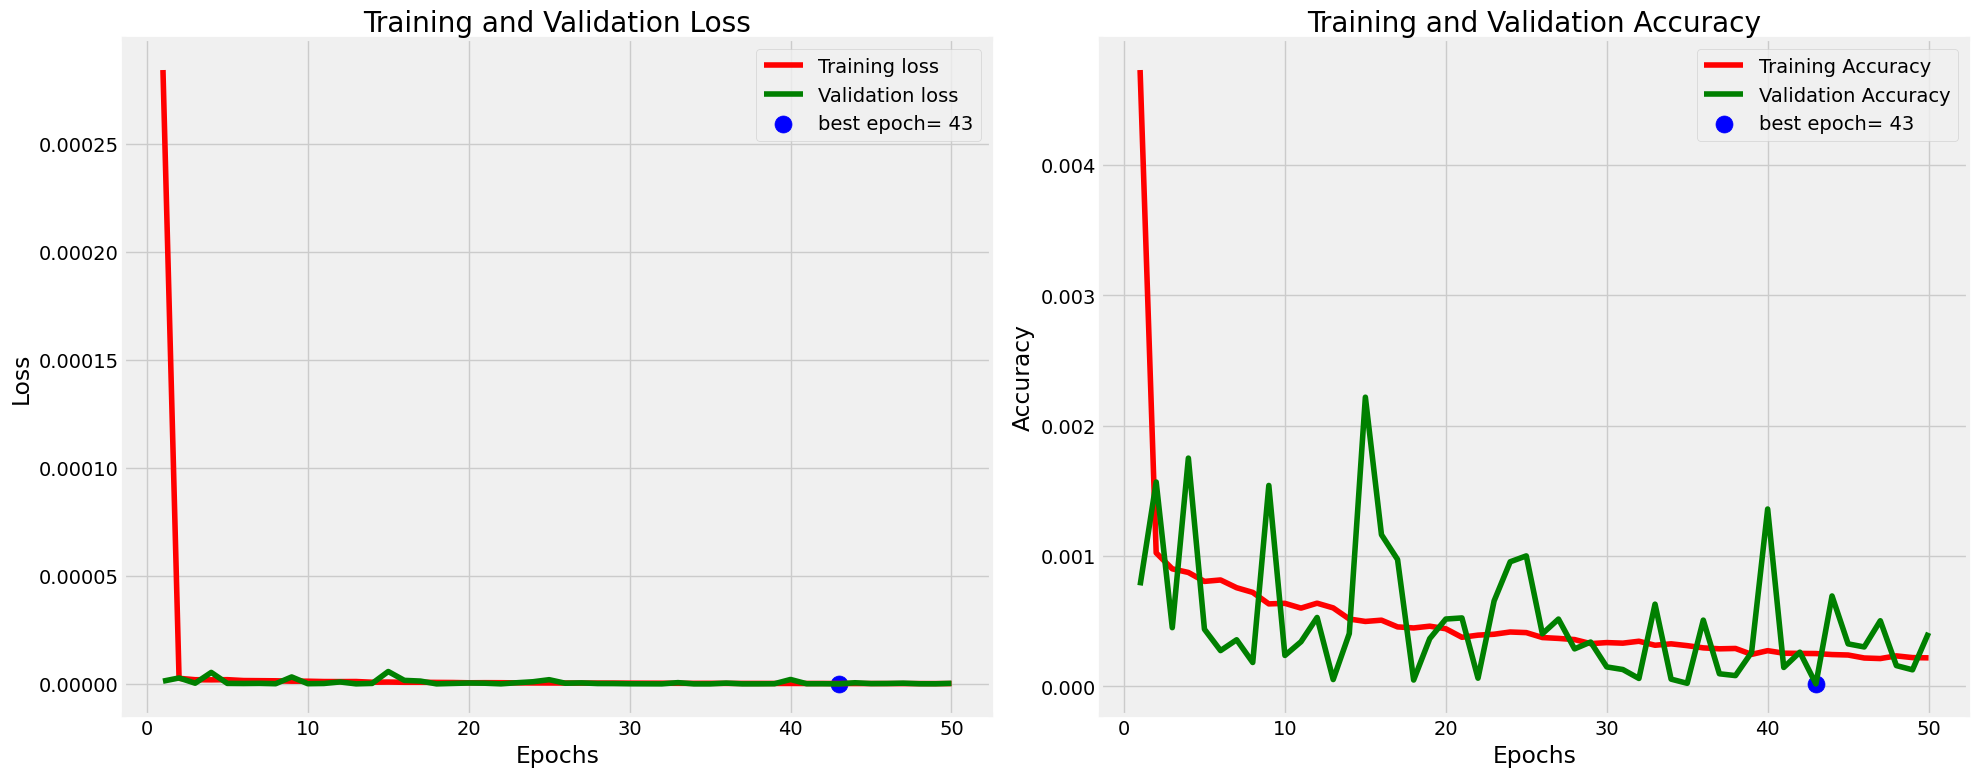

In [ ]:
tr_acc = history.history['mean_absolute_error']
tr_loss = history.history['loss']
val_acc = history.history['val_mean_absolute_error']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmin(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

CLASSIFICATION PERFORMANCE

In [ ]:
# Menentukan threshold untuk klasifikasi
threshold = 0.5

# Mengubah target menjadi kategori biner berdasarkan threshold
y_test_binary = (y_test > threshold).astype(int)
y_pred_class_binary = (ann_y_pred > threshold).astype(int)

# Menampilkan classification performance
from sklearn.metrics import classification_report

print("Classification Performance:")
print(classification_report(y_test_binary, y_pred_class_binary))

Classification Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     87614
           1       1.00      0.99      1.00       411

    accuracy                           1.00     88025
   macro avg       1.00      1.00      1.00     88025
weighted avg       1.00      1.00      1.00     88025



berguna untuk mengevaluasi kinerja model regresi sebagai masalah klasifikasi biner dengan menggunakan ambang batas tertentu (dalam kasus ini, 0.5). Dengan mengonversi nilai target dan prediksi menjadi label biner (0 atau 1), kita dapat menggunakan metrik evaluasi klasifikasi seperti presisi, recall, f1-score, dan akurasi untuk menilai kinerja model.

Laporan klasifikasi yang dihasilkan memberikan informasi tentang seberapa baik model dapat mengklasifikasikan data ke dalam dua kelas (0 dan 1) berdasarkan ambang batas yang ditetapkan. Informasi ini dapat membantu mengidentifikasi apakah model cenderung overpredict atau underpredict salah satu kelas, dan dapat digunakan untuk menyesuaikan ambang batas atau melakukan tuning pada model jika diperlukan.

CONFUSION MATRIKS

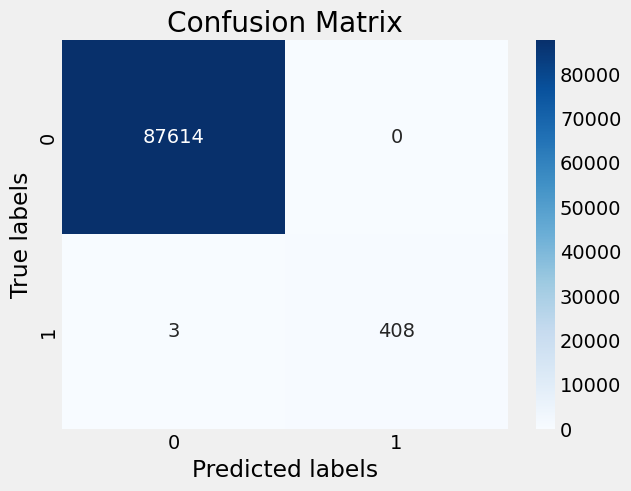

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Menampilkan confusion matrix
cm = confusion_matrix(y_test_binary, y_pred_class_binary)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Confusion matrix memberikan informasi tentang jumlah prediksi yang benar dan salah untuk setiap kelas. Dalam kasus klasifikasi biner, confusion matrix adalah matriks 2x2 yang menunjukkan: True Positives (TP): Jumlah sampel positif yang diprediksi dengan benar sebagai positif. True Negatives (TN): Jumlah sampel negatif yang diprediksi dengan benar sebagai negatif. False Positives (FP): Jumlah sampel negatif yang diprediksi secara salah sebagai positif. False Negatives (FN): Jumlah sampel positif yang diprediksi secara salah sebagai negatif. Visualisasi confusion matrix sebagai heatmap membantu memahami kinerja model klasifikasi dengan lebih baik dan mengidentifikasi jenis kesalahan yang dilakukan oleh model (FP atau FN). Semakin banyak nilai yang terkonsentrasi di diagonal utama (TP dan TN), semakin baik kinerja model.

LOST PERFORMANCE

In [ ]:
# Menghitung dan menampilkan log loss performance
from sklearn.metrics import log_loss

logloss = log_loss(y_test_binary, ann_y_pred)
print("Log Loss:", logloss)

Log Loss: 0.06098153542031017


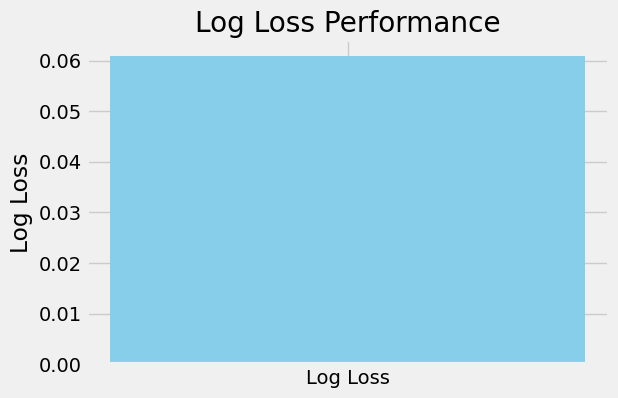

In [ ]:
# Plot Log Loss
plt.figure(figsize=(6, 4))
plt.bar(['Log Loss'], [logloss], color='skyblue')
plt.ylabel('Log Loss')
plt.title('Log Loss Performance')
plt.show()

Log loss (atau cross-entropy loss) adalah metrik evaluasi yang umum digunakan dalam masalah klasifikasi, terutama untuk model yang menghasilkan probabilitas prediksi. Log loss mengukur kinerja model dengan mempertimbangkan ketidakpastian prediksi. Semakin rendah nilai log loss, semakin baik kinerja model. Log loss memberikan informasi tentang seberapa baik model dapat membedakan antara kelas positif dan negatif, serta seberapa yakin model dalam memprediksi setiap kelas. Nilai log loss yang rendah mengindikasikan bahwa model dapat membuat prediksi yang tepat dengan tingkat kepercayaan yang tinggi. Visualisasi log loss sebagai plot batang membantu Anda memahami kinerja model secara keseluruhan dan membandingkannya dengan model atau baseline lain.

PREDIKSI LABEL DALAM BENTUK HISTOGRAM

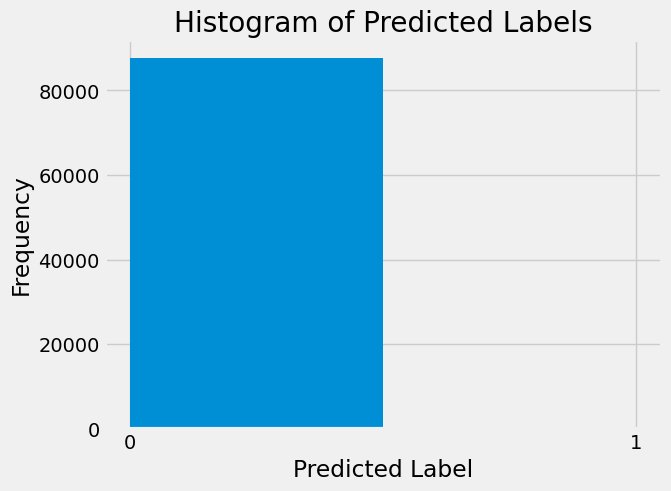

In [ ]:
plt.hist(y_pred_class_binary, bins=2)
plt.xlabel('Predicted Label')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Labels')
plt.xticks([0, 1])  # Mengatur label sumbu x ke nilai kelas yang mungkin (0 dan 1)
plt.show()

memvisualisasikan distribusi prediksi label biner dalam bentuk histogram. memperlihatkan sebarapa banyak prediksi yang dilakukan untuk setiap kelas (0 atau 1). membantu memahami kinerja model klasifikasi biner dan mungkin memberikan wawasan tentang bagaimana model tersebut memprediksi data.

ROC (Receiver Operating Characteristic)

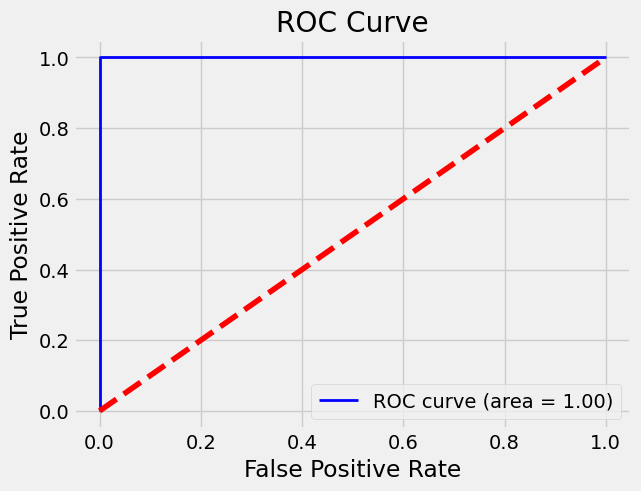

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test_binary, ann_y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

memvisualisasikan dan menghitung nilai AUC (Area Under the Curve) untuk model klasifikasi biner. menggambarkan hubungan antara True Positive Rate (TPR) dan False Positive Rate (FPR) untuk berbagai ambang batas keputusan. Semakin dekat kurva mendekati sudut kiri atas, semakin baik kinerja model klasifikasi. Nilai AUC (Area Under the Curve) berkisar antara 0 hingga 1, dengan nilai yang lebih tinggi mengindikasikan kinerja klasifikasi yang lebih baik.

Visualisasi kurva ROC dan nilai AUC membantu mengevaluasi kinerja model klasifikasi biner secara keseluruhan dan membandingkannya dengan klasifikasi acak (garis diagonal).

CLASSIFICATION RESULT

<ipython-input-47-98d6f47fceff>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Result', data=classification_result_df, palette='Set2')


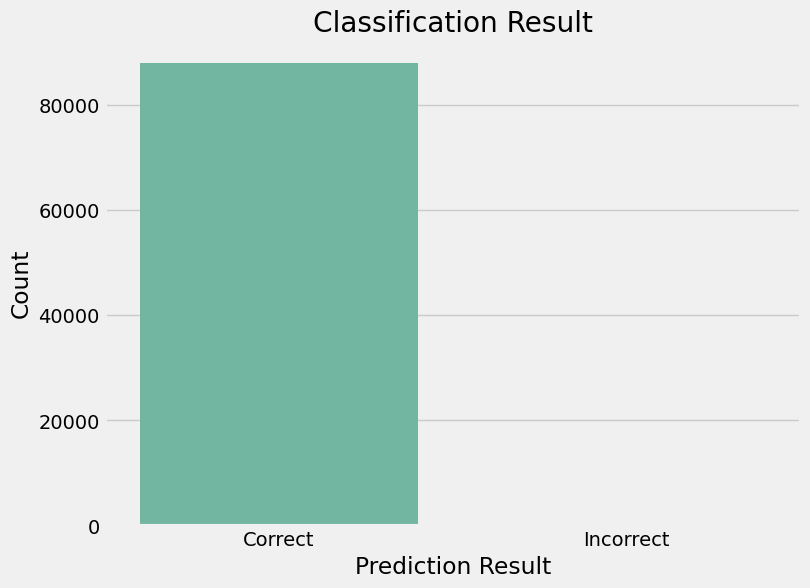

In [ ]:
import pandas as pd

# Membuat DataFrame kosong
classification_result_df = pd.DataFrame()

# Plot Classification Result
plt.figure(figsize=(8, 6))
classification_result_df['Result'] = ['Correct' if actual == predicted else 'Incorrect' for actual, predicted in zip(y_test_binary, y_pred_class_binary)]
sns.countplot(x='Result', data=classification_result_df, palette='Set2')
plt.xlabel('Prediction Result')
plt.ylabel('Count')
plt.title('Classification Result')
plt.show()

In [ ]:
# Kategorisasi penggunaan energi rumah
def categorize_energy_usage(energy):
    if energy < 3:
        return "Hemat"
    elif energy < 6:
        return "Sedang"
    else:
        return "Boros"

In [ ]:
# Menambahkan kolom kategori energi rumah ke DataFrame
df['Energy Category'] = df['House overall [kW]'].apply(categorize_energy_usage)

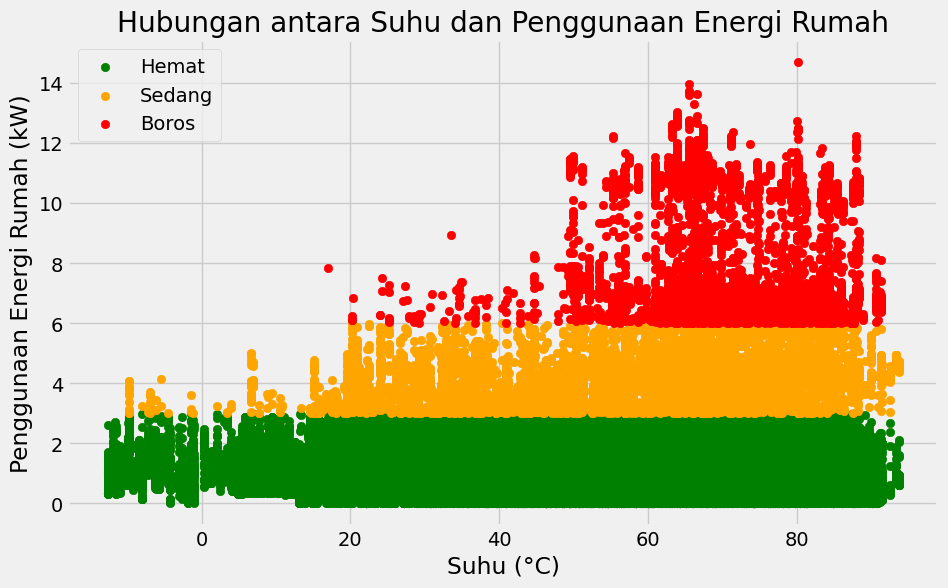

In [ ]:
# Membuat plot
plt.figure(figsize=(10, 6))

# Plot untuk kategori hemat
plt.scatter(df[df['Energy Category'] == 'Hemat']['temperature'],
            df[df['Energy Category'] == 'Hemat']['House overall [kW]'],
            color='green', label='Hemat')

# Plot untuk kategori sedang
plt.scatter(df[df['Energy Category'] == 'Sedang']['temperature'],
            df[df['Energy Category'] == 'Sedang']['House overall [kW]'],
            color='orange', label='Sedang')

# Plot untuk kategori boros
plt.scatter(df[df['Energy Category'] == 'Boros']['temperature'],
            df[df['Energy Category'] == 'Boros']['House overall [kW]'],
            color='red', label='Boros')

plt.title('Hubungan antara Suhu dan Penggunaan Energi Rumah')
plt.xlabel('Suhu (°C)')
plt.ylabel('Penggunaan Energi Rumah (kW)')
plt.legend()
plt.grid(True)
plt.show()

KELOMPOK 5
ANGGOTA:
- MUHAMMAD ZAKY AYYASY ARDHANA (5311422132)
- MUHAMMAD RICARDO QUARISMA (5311422135)
- ABDULLOH (5311422136)
- NAUFAL AHMAD FAUZAN (5311422137)
- FIRDAUS RIZKY NURHADI (5311422138)